In [50]:
import numpy as np
from astropy.io import fits
import os
import glob
import pandas as pd
import dawis as d
import matplotlib.pyplot as plt
from matplotlib import colors, colorbar
from matplotlib.gridspec import GridSpec
from matplotlib.lines import Line2D
import matplotlib.image as mpimg
from astropy.visualization import *
from astropy.wcs import WCS
from astropy.visualization import make_lupton_rgb
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.offsetbox import AnchoredText
from scipy.ndimage import gaussian_filter
from scipy.ndimage import zoom
import pyregion as pyr
import cmasher
import matplotlib as mpl
import pyregion as pyr
import dawis

In [56]:
# Paths, lists & variables
path_data = '/home/aellien/Euclid_ERO/data/Euclid-NISP-Stack-ERO-Abell2390.DR3'
path_scripts = '/home/aellien/Euclid_ERO/Euclid_ERO_scripts'
path_wavelets = '/home/aellien/Euclid_ERO/wavelets/out11/'
path_plots = '/home/aellien/Euclid_ERO/plots/pub'
path_analysis = '/home/aellien/Euclid_ERO/analysis/'

filters = [ 'H', 'Y', 'J' ]

ZP = 30.1
pix_scale = 0.3 * 4

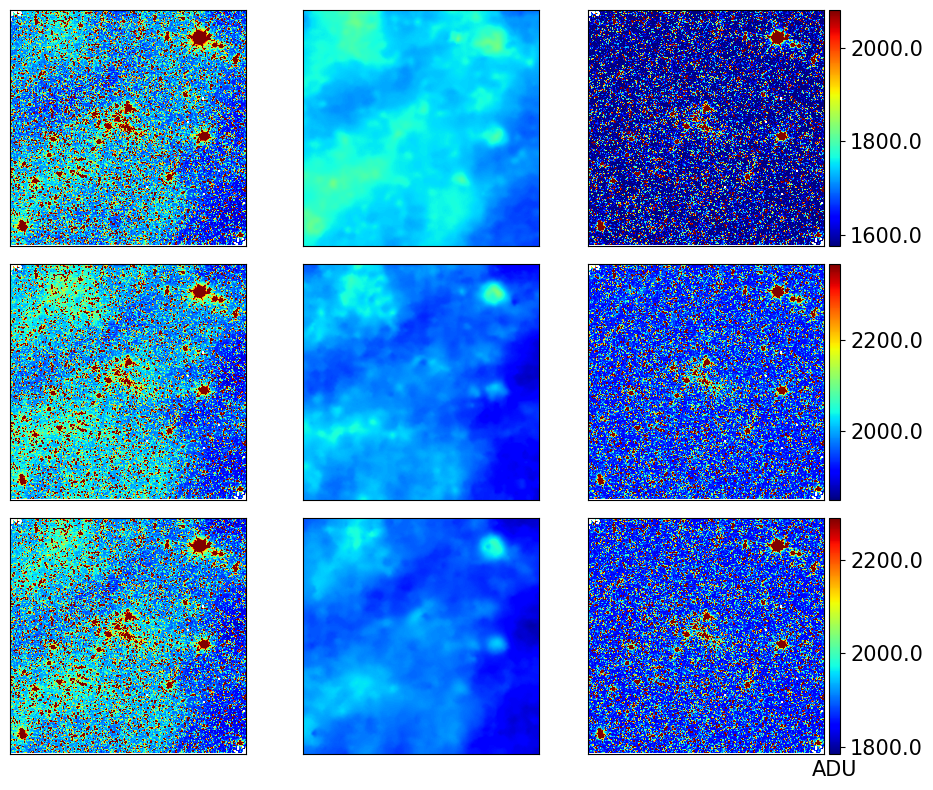

In [116]:
# Plot oim / cirim / clean in ADU
fig, ax = plt.subplots(3, 3, figsize = (10,8))
cmap = plt.cm.jet

for i, filt in enumerate(filters):

    hdu = fits.open(os.path.join(path_wavelets, 'Euclid-NISP-%s-ERO-Abell2390-LSB.DR3.rot.crop.warp.input.synth.cirrus_res_altpass2.fits'%filt))
    #oim = fits.getdata(os.path.join(path_data, 'Euclid-NISP-%s-ERO-Abell2390-LSB.DR3.rot.crop.warp.input.fits'%filt))
    #cirim = fits.getdata(os.path.join(path_wavelets, 'Euclid-NISP-%s-ERO-Abell2390-LSB.DR3.rot.crop.warp.input.synth.cirrus_res_altpass2.fits'%filt))
    #clean = oim - cirim
    #hdu = fits.open(nfp)
    oim = hdu[1].data
    clean = hdu[2].data
    cirim = hdu[3].data

    noise_pixels, val_max = dawis.sample_noise(oim[:400, 1800:], n_sigmas = 3, bins = 300)

    ax[i][0].imshow(oim, norm = ImageNormalize( oim, interval = ZScaleInterval(), \
                                stretch = LinearStretch()), cmap = cmap, origin = 'lower')
    ax[i][0].get_xaxis().set_ticks([])
    ax[i][0].get_yaxis().set_ticks([])
    
    poim2 = ax[i][1].imshow(cirim, norm = ImageNormalize( oim, interval = ZScaleInterval(), \
                                stretch = LinearStretch()), cmap = cmap, origin = 'lower')
    ax[i][1].get_xaxis().set_ticks([])
    ax[i][1].get_yaxis().set_ticks([])
                    
    poim = ax[i][2].imshow(clean + val_max, norm = ImageNormalize( oim, interval = ZScaleInterval(), \
                                stretch = LinearStretch()), cmap = cmap, origin = 'lower')
    ax[i][2].get_xaxis().set_ticks([])
    ax[i][2].get_yaxis().set_ticks([])
    
    divider = make_axes_locatable(ax[i][2])

    cax = divider.append_axes("right", size="5%", pad=0.05)
    caxre = fig.colorbar( poim2, cax = cax, \
                                cmap = cmap, \
                                orientation = 'vertical', \
                                format = '%2.1f',\
                                pad = 0,\
                                shrink = 1.0,\
                                ticklocation = 'right' )
    caxre.ax.tick_params(labelsize = 15)
    if i == 2:
        cax.set_xlabel('ADU', fontsize = 15)
plt.tight_layout()
plt.savefig(os.path.join(path_plots, 'cirrus_clean.pdf'), format = 'pdf')
plt.show()
  

/home/aellien/Euclid_ERO/wavelets/out11/Euclid-NISP-H-ERO-Abell2390-LSB.DR3.rot.crop.warp.input.synth.cirrus_lvl5.fits


1635.0674011357132 1649.065
0.6285827984258398
/home/aellien/Euclid_ERO/wavelets/out11/Euclid-NISP-Y-ERO-Abell2390-LSB.DR3.rot.crop.warp.input.synth.cirrus_lvl5.fits


1916.3336905511896 1918.9552
0.6285827984258398
/home/aellien/Euclid_ERO/wavelets/out11/Euclid-NISP-J-ERO-Abell2390-LSB.DR3.rot.crop.warp.input.synth.cirrus_lvl5.fits


1841.4056337589302 1847.6864
0.6285827984258398


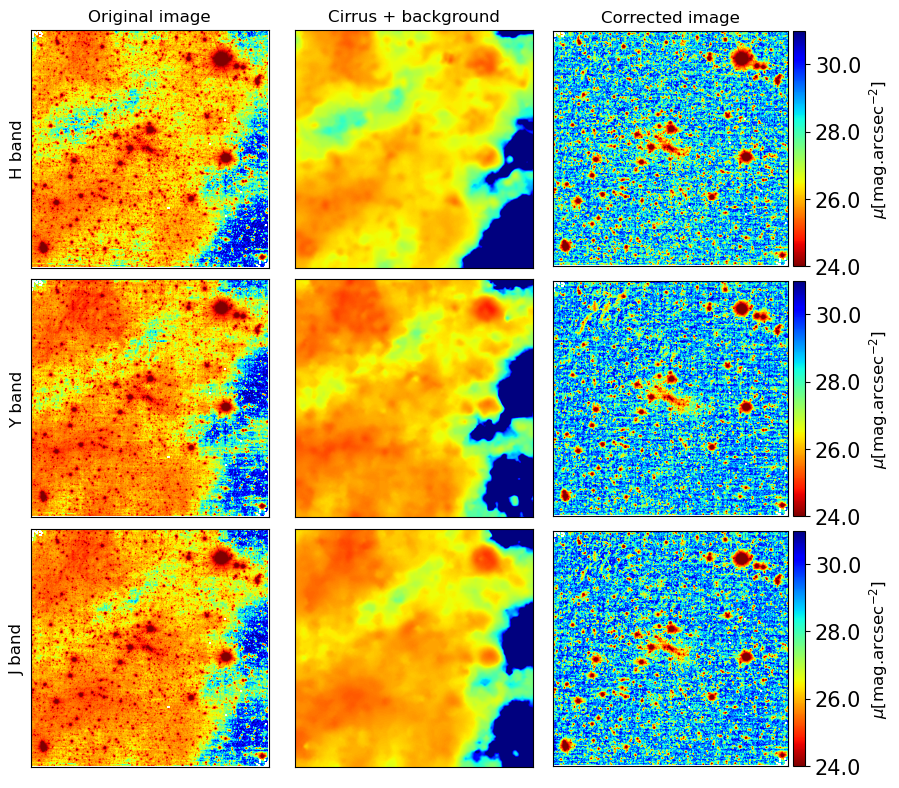

In [132]:
# Plot oim / cirim / clean in MAG
fig, ax = plt.subplots(3, 3, figsize = (9,8))
cmap = plt.cm.jet_r

for i, filt in enumerate(filters):

    hdu = fits.open(os.path.join(path_wavelets, 'Euclid-NISP-%s-ERO-Abell2390-LSB.DR3.rot.crop.warp.input.synth.cirrus_res_altpass2.fits'%filt))
    #oim = fits.getdata(os.path.join(path_data, 'Euclid-NISP-%s-ERO-Abell2390-LSB.DR3.rot.crop.warp.input.fits'%filt))
    #cirim = fits.getdata(os.path.join(path_wavelets, 'Euclid-NISP-%s-ERO-Abell2390-LSB.DR3.rot.crop.warp.input.synth.cirrus_res_altpass2.fits'%filt))
    #clean = oim - cirim
    #hdu = fits.open(nfp)
    oim = hdu[1].data
    clean = hdu[2].data
    cirim = hdu[3].data

    hduo, hdu_oim, hdu_clean, hdu_cirim, hdu_derim, hdu_recim, hdu_res = fits.open(os.path.join(path_wavelets, 'Euclid-NISP-%s-ERO-Abell2390-LSB.DR3.rot.crop.warp.input.synth.cirrus_lvl5.fits'%filt))
    print(os.path.join(path_wavelets, 'Euclid-NISP-%s-ERO-Abell2390-LSB.DR3.rot.crop.warp.input.synth.cirrus_lvl5.fits'%filt))
    res = hdu_res.data
    
    noise_pixels, val_max_res = dawis.sample_noise(res[:, 1800:], n_sigmas = 3, bins = 300)
    noise_pixels, val_max_oim = dawis.sample_noise(oim[:, 1800:], n_sigmas = 3, bins = 300)
    
    print(val_max_res, val_max_oim)
    low_lim = pix_scale**2 * 10**( ( 31 - ZP ) / -2.5 )
    print(low_lim)
    
    mag_oim = np.copy(oim - val_max_res)
    mag_oim[mag_oim <= low_lim] = low_lim
    mag_oim = - 2.5 * np.log10(mag_oim / pix_scale**2) + ZP 
    mag_oim[mag_oim < 24] = 24

    mag_cirim = np.copy(cirim - val_max_res)
    mag_cirim[mag_cirim <= low_lim] = low_lim
    mag_cirim = - 2.5 * np.log10(mag_cirim / pix_scale**2) + ZP
    mag_cirim[mag_cirim < 24] = 24

    mag_clean = np.copy(clean)
    mag_clean[mag_clean <= low_lim] = low_lim
    mag_clean = - 2.5 * np.log10(mag_clean / pix_scale**2) + ZP
    mag_clean[mag_clean < 24] = 24
    
    ax[i][0].imshow(mag_oim, norm = ImageNormalize( mag_oim, interval = MinMaxInterval(), \
                                stretch = LinearStretch()), cmap = cmap, origin = 'lower')
    ax[i][0].get_xaxis().set_ticks([])
    ax[i][0].get_yaxis().set_ticks([])
    
    ax[i][1].imshow(mag_cirim, norm = ImageNormalize( mag_oim, interval = MinMaxInterval(), \
                                stretch = LinearStretch()), cmap = cmap, origin = 'lower')
    ax[i][1].get_xaxis().set_ticks([])
    ax[i][1].get_yaxis().set_ticks([])
                    
    poim = ax[i][2].imshow(mag_clean, norm = ImageNormalize( mag_oim, interval = MinMaxInterval(), \
                                stretch = LinearStretch()), cmap = cmap, origin = 'lower')
    ax[i][2].get_xaxis().set_ticks([])
    ax[i][2].get_yaxis().set_ticks([])
    
    divider = make_axes_locatable(ax[i][2])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    caxre = fig.colorbar( poim, cax = cax, \
                                cmap = cmap, \
                                orientation = 'vertical', \
                                format = '%2.1f',\
                                pad = 0,\
                                shrink = 1.0,\
                                ticklocation = 'right' )
    caxre.ax.tick_params(labelsize = 15)
    cax.set_ylabel(r'$\mu$[mag.arcsec$^{-2}$]', fontsize = 12)

    ax[i][0].set_ylabel('%s band'%filt, fontsize = 12)

ax[0][0].set_title('Original image', fontsize = 12)
ax[0][1].set_title('Cirrus + background', fontsize = 12)
ax[0][2].set_title('Corrected image', fontsize = 12)

plt.tight_layout()
plt.subplots_adjust(left= None, bottom = None, right = None, top = None, wspace = 0.05, hspace = 0.05)
plt.savefig(os.path.join(path_plots, 'cirrus_clean.png'), format = 'png')
plt.show()

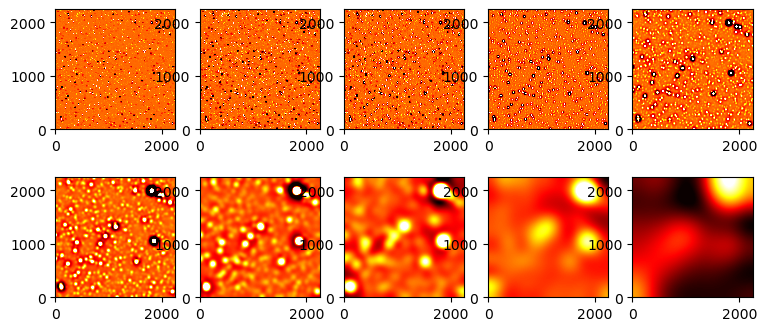

In [148]:
hdu = fits.open(os.path.join(path_wavelets, 'Euclid-NISP-%s-ERO-Abell2390-LSB.DR3.rot.crop.warp.input.synth.cirrus_res_altpass2.fits'%filt))
oim = hdu[1].data
# inpaint
noise_pixels, val_max = dawis.sample_noise(oim, n_sigmas = 3, bins = 300)
mean, std = np.mean(noise_pixels), np.std(noise_pixels)
mask = np.zeros(oim.shape)
mask[ oim < -abs(5 * std) ] = 1.
mask[np.where(np.isnan(oim) == True)] = 1.
draws = np.random.normal(mean, std, oim.shape)
mask *= draws
oim[ oim < -abs(5 * std) ] = 0.
oim[ np.where(np.isnan(oim) == True)] = 0.
oim += mask

wdc = dawis.bspl_atrous(oim, 10, None, 'prolongations')

fig, ax = plt.subplots(2, 5, figsize = (9,4))

for i in range(5):
    ax[0][i].imshow(wdc.array[:,:,i], origin = 'lower', norm = ImageNormalize( wdc.array[:,:,i], interval = ZScaleInterval(), \
                                stretch = LinearStretch()), cmap = 'hot')

for i in range(5, 10):
    ax[1][i-5].imshow(wdc.array[:,:,i], origin = 'lower', norm = ImageNormalize( wdc.array[:,:,i], interval = ZScaleInterval(), \
                                stretch = LinearStretch()), cmap = 'hot')

In [136]:
wdc.array.shape

(2251, 2251, 10)

0.6285827984258398 396.6089332806963


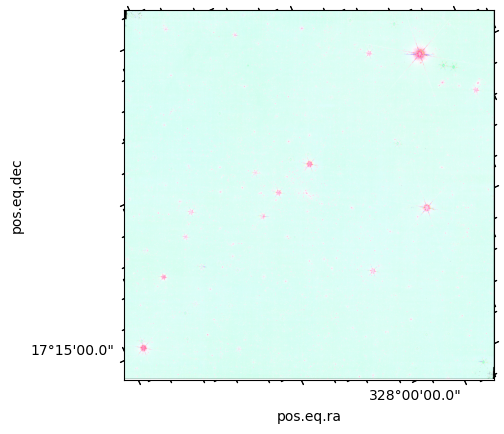

In [179]:
# plot RGB oim to show cirrus color variation
hdu = fits.open(os.path.join(path_wavelets, 'Euclid-NISP-H-ERO-Abell2390-LSB.DR3.rot.crop.warp.input.synth.cirrus_res_altpass2.fits'))
H = hdu[1].data
hdu = fits.open(os.path.join(path_wavelets, 'Euclid-NISP-Y-ERO-Abell2390-LSB.DR3.rot.crop.warp.input.synth.cirrus_res_altpass2.fits'))
Y = hdu[1].data
hdu = fits.open(os.path.join(path_wavelets, 'Euclid-NISP-J-ERO-Abell2390-LSB.DR3.rot.crop.warp.input.synth.cirrus_res_altpass2.fits'))
J = hdu[1].data
hdu = fits.open('~/Euclid_ERO/data/Euclid-VIS-Stack-ERO-Abell2390.DR3/Euclid-VIS-ERO-Abell2390-LSB.DR3.warp.scaled.crop.input.fits')
VIS = hdu[0].data

low_lim = pix_scale**2 * 10**( ( 31 - ZP ) / -2.5 )
high_lim = pix_scale**2 * 10**( ( 24 - ZP ) / -2.5 )
print(low_lim, high_lim)

plt.figure()
wcs = WCS(hdu[0].header)
plt.subplot(projection = wcs)
ax = plt.gca()
ra = ax.coords['ra']
dec = ax.coords['dec']
ra.set_major_formatter('dd:mm:ss.s')
dec.set_major_formatter('dd:mm:ss.s')
ra.display_minor_ticks(True)
dec.display_minor_ticks(True)

#plt.imshow(VIS, norm = ImageNormalize( VIS, interval = ZScaleInterval(), \
#                                stretch = LinearStretch()), cmap = cmap, origin = 'lower')

rgb = make_lupton_rgb(H, Y, J, stretch=0.5)
plt.imshow(rgb, origin='lower')
plt.show()

In [151]:
VIS.shape

(2701, 2701)

In [163]:
help(ra.set_major_formatter)

Help on method set_major_formatter in module astropy.visualization.wcsaxes.coordinate_helpers:

set_major_formatter(formatter) method of astropy.visualization.wcsaxes.coordinate_helpers.CoordinateHelper instance
    Set the formatter to use for the major tick labels.
    
    Parameters
    ----------
    formatter : str or `~matplotlib.ticker.Formatter`
        The format or formatter to use.

